## install packages

In [ ]:
!pip install xgboost
!pip install category-encoders

## read the dataset

In [ ]:
import pandas as pd

df = pd.read_excel( "PIA_data_model.xlsx" )

In [2]:
df.head()

,age_range,archetype,auto_ind,base_tier_price,COMPETITIVE_AREA,corp,cpe,cust_equip_class,cust_tenure_id,cust_type,...,wfindate,wfindate_day_id,who,wntrk,wordate,wordate_day_id,work_order_status,work_order_status_id,wstat,zipcode
0,Not Assigned,NaN,0,0.0,Non-Competitive,7701,NaN,NaN,0,3,...,2022-01-06,20220106,NaN,0,2022-01-01,20220101,Connect,5,5,71743
1,Not Assigned,NaN,0,50.0,Competitive-SDL,7701,NaN,NaN,0,3,...,2022-07-18,20220718,NaN,0,2022-07-15,20220715,Connect,5,5,72401
2,Not Assigned,NaN,0,40.0,Competitive-SDL,7701,NaN,NaN,0,3,...,2022-09-29,20220929,NaN,0,2022-09-21,20220921,Connect,5,5,72401
3,Not Assigned,NaN,0,20.0,Non-Competitive,7701,NaN,NaN,0,3,...,2022-08-02,20220802,NaN,1,2022-08-02,20220802,Connect,5,5,72801
4,Not Assigned,NaN,0,20.0,Non-Competitive,7701,NaN,NaN,0,3,...,2022-08-05,20220802,NaN,0,2022-08-05,20220802,Connect,5,B,72801


## check the overview of the dataset

In [3]:
df.columns

Index(['age_range', 'archetype', 'auto_ind', 'base_tier_price',
       'COMPETITIVE_AREA', 'corp', 'cpe', 'cust_equip_class', 'cust_tenure_id',
       'cust_type',
       ...
       'wfindate', 'wfindate_day_id', 'who', 'wntrk', 'wordate',
       'wordate_day_id', 'work_order_status', 'work_order_status_id', 'wstat',
       'zipcode'],
      dtype='object', length=165)

> The dataset contains several numerical and categorical columns providing various information

In [4]:
# let's break down the columns by their type (i.e. int64, float64, object)
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['auto_ind', 'corp', 'cust_tenure_id', 'data_speed', 'disco', 'fm_reconnector', 'fta', 'ftth_sale_flag', 'house', 'median_age', 'month_at_disco', 'move_transfer_flag', 'pia_corp_cvt', 'pia_corp_flag', 'pia_paid_flag', 'Right_corp', 'Right_cust_tenure_id', 'Right_sales_rep_type_id', 'Right_wip_transaction_id', 'sales_rep_type_id', 'wc_io_ppof_rev_change', 'wc_m2m_revenue_change', 'wc_ov_equip_rev_change', 'wc_ov_intl_revenue_change', 'wc_total_workorders', 'wfindate_day_id', 'wntrk', 'wordate_day_id', 'work_order_status_id'], float64: ['base_tier_price', 'fm_connectfios', 'fm_disconnectfios', 'fm_mover', 'fm_source', 'fm_to_chc', 'install_charges', 'last_lift', 'last_lift_month', 'median_income', 'pia_amount', 'pos_payments', 'post_install_payments_30_days', 'post_install_payments_60_days', 'post_install_payments_7_days', 'pre_sched_date_payment', 'revenue_change', 'Right_chc_id', 'Right_wc_analog_ppof_rev_change', 'Right_work_order_status_id', 'sale_revenue', 'sched_date_paymen

In [5]:
# Columns datatypes and missign values
column_nulls = df.isna().sum()

In [6]:
column_set =  df.columns
total_rows =  df.shape[0]

In [7]:
# drop column which having more than 50% nulll values , which is not containing much valuabale information
col_use = []

for i_col , i_nullset in zip( column_set, column_nulls ) :
    # calculate the null percentage
    null_perc =  i_nullset / total_rows
    # if null percentage <50% then drop those columns
    if( null_perc <= 0.2 ):
        col_use.append( i_col )

> define the new dataframe using filtered colms

In [8]:
df_filtered = df[  col_use ]

In [9]:
import numpy as np

num_cols = df_filtered.loc[:, df_filtered.dtypes.isin( [np.dtype('int64') , np.dtype('float64') ] ) ].columns
cat_cols = df_filtered.loc[:, df_filtered.dtypes == np.dtype('O') ].columns
date_cols =  df_filtered.loc[ : ,  df_filtered.dtypes==np.dtype('<M8[ns]') ].columns

## check each categorical column data distribution

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
df_filtered[cat_cols].head()

,age_range,archetype,COMPETITIVE_AREA,cust_type,dept_group,dept_source,ethnic_desc,ethnic_group_desc,fiber_flag,headend,house_mkt_code,income_range,labox_flag,lifestage,mdu_flag,misc_combo_str_desc,ool_tier,operating_area,ov_combo_str_desc,ov_tier,prem_combo_str_desc,product_brand,product_class_desc,Right_slsrep,sales_channel,sales_rep_type_desc,sales_source_desc,slsrep,SPEED_GROUP,speed_tier,state,video_tier,Video_tier_group,work_order_status,wstat,zipcode
0,Not Assigned,NaN,Non-Competitive,3,Technical Project Mgmt,BILLING,Not Assigned,Not Assigned,NO,"Arkadelphia, AR",M,Not Assigned,No,Not Assigned,N,OFFER TRACK2+ALTICE GATEWAY FEE - $10,$89.99,Mid South,NO OV ADDNL SVC,Other,NO PREMIUM SVC,SUDDENLINK,OOL,7,Ecomm,OOL.COM,WEB SITE,7,100,BROADBAND INTERNET 100,AR,OTHER,OTHERS,Connect,5,71743
1,Not Assigned,NaN,Competitive-SDL,3,Ecommerce Sales,SALES-OTHER,Not Assigned,Not Assigned,NO,"Jonesboro, AR",P,Not Assigned,No,Not Assigned,N,HBO MAX - $14.99+OFFER TRACK2+STREAM - $5,$89.99,Mid South,NO OV ADDNL SVC,Other,NO PREMIUM SVC,SUDDENLINK,OOL,E2S,Ecomm,ECOMM,WEB SITE,E2S,1GB,BROADBAND INTERNET 1000,AR,OTHER,OTHERS,Connect,5,72401
2,Not Assigned,NaN,Competitive-SDL,3,Technical Project Mgmt,BILLING,Not Assigned,Not Assigned,NO,"Jonesboro, AR",P,Not Assigned,No,Not Assigned,N,OFFER TRACK2+AUTOPAY DISCOUNT,$89.99,Mid South,NO OV ADDNL SVC,Other,NO PREMIUM SVC,SUDDENLINK,OOL,7,Ecomm,OOL.COM,WEB SITE,7,201-500,BROADBAND INTERNET 500,AR,OTHER,OTHERS,Connect,5,72401
3,Not Assigned,NaN,Non-Competitive,3,NaN,OTHER,Not Assigned,Not Assigned,NO,"Russellville, AR",P,Not Assigned,No,Not Assigned,N,AUTOPAY DISCOUNT,$89.99,Mid South,NO OV ADDNL SVC,Other,NO PREMIUM SVC,SUDDENLINK,VIDEO/OOL,9,Inbound Sales,SALES INBOUND,INBOUND,9,201-500,BROADBAND INTERNET 300,AR,SDL - BASIC,BASIC,Connect,5,72801
4,Not Assigned,NaN,Non-Competitive,3,NaN,OTHER,Not Assigned,Not Assigned,NO,"Russellville, AR",P,Not Assigned,No,Not Assigned,N,AUTOPAY DISCOUNT,$89.99,Mid South,NO OV ADDNL SVC,Other,NO PREMIUM SVC,SUDDENLINK,VIDEO/OOL,9,Other,SALES INBOUND,INBOUND,2,201-500,BROADBAND INTERNET 300,AR,SDL - BASIC,BASIC,Connect,B,72801


In [12]:
cat_column_uniques = []

# measure the column unique categories
for i_col in  cat_cols :
    cat_column_uniques.append( len(df_filtered[i_col].value_counts() ))
    print( f"Col Name : {i_col} Unique Categories : {len(df_filtered[i_col].value_counts()) }" )

Col Name : age_range Unique Categories : 5
Col Name : archetype Unique Categories : 8
Col Name : COMPETITIVE_AREA Unique Categories : 8
Col Name : cust_type Unique Categories : 15
Col Name : dept_group Unique Categories : 25
Col Name : dept_source Unique Categories : 11
Col Name : ethnic_desc Unique Categories : 202
Col Name : ethnic_group_desc Unique Categories : 19
Col Name : fiber_flag Unique Categories : 2
Col Name : headend Unique Categories : 292
Col Name : house_mkt_code Unique Categories : 14
Col Name : income_range Unique Categories : 5
Col Name : labox_flag Unique Categories : 2
Col Name : lifestage Unique Categories : 48
Col Name : mdu_flag Unique Categories : 2
Col Name : misc_combo_str_desc Unique Categories : 3663
Col Name : ool_tier Unique Categories : 48
Col Name : operating_area Unique Categories : 17
Col Name : ov_combo_str_desc Unique Categories : 71
Col Name : ov_tier Unique Categories : 25
Col Name : prem_combo_str_desc Unique Categories : 95
Col Name : product_bra

In [77]:
# initial work remove categorical column with higher number of unique categories

"""
columns to drop :  
    1. ethnic_desc
    2. headend
    3. misc_combo_str_desc	
    4. prem_combo_str_desc
    5. Right_slsrep
    6. slsrep 
    7. zipcode

"""

> categorical column name with it's no. of unique categories

    Col Name : age_range Unique Categories : 5
    Col Name : archetype Unique Categories : 8
    Col Name : COMPETITIVE_AREA Unique Categories : 8
    Col Name : cust_type Unique Categories : 15
    Col Name : dept_group Unique Categories : 25
    Col Name : dept_source Unique Categories : 11
    Col Name : ethnic_desc Unique Categories : 202
    Col Name : ethnic_group_desc Unique Categories : 19
    Col Name : fiber_flag Unique Categories : 2
    Col Name : headend Unique Categories : 292
    Col Name : house_mkt_code Unique Categories : 14
    Col Name : income_range Unique Categories : 5
    Col Name : labox_flag Unique Categories : 2
    Col Name : lifestage Unique Categories : 48
    Col Name : mdu_flag Unique Categories : 2
    Col Name : misc_combo_str_desc Unique Categories : 3663
    Col Name : ool_tier Unique Categories : 48
    Col Name : operating_area Unique Categories : 17
    Col Name : ov_combo_str_desc Unique Categories : 71
    Col Name : ov_tier Unique Categories : 25
    Col Name : prem_combo_str_desc Unique Categories : 95
    Col Name : product_brand Unique Categories : 2
    Col Name : product_class_desc Unique Categories : 7
    Col Name : Right_slsrep Unique Categories : 4462
    Col Name : sales_channel Unique Categories : 9
    Col Name : sales_rep_type_desc Unique Categories : 19
    Col Name : sales_source_desc Unique Categories : 10
    Col Name : slsrep Unique Categories : 3100
    Col Name : SPEED_GROUP Unique Categories : 7
    Col Name : speed_tier Unique Categories : 37
    Col Name : state Unique Categories : 21
    Col Name : video_tier Unique Categories : 19
    Col Name : Video_tier_group Unique Categories : 9
    Col Name : work_order_status Unique Categories : 2
    Col Name : wstat Unique Categories : 5
    Col Name : zipcode Unique Categories : 1971


In [13]:
cat_columns_analysis = set(cat_cols) - set( [ 'ethnic_desc' , 'headend' , 'misc_combo_str_desc' , 'prem_combo_str_desc' , 'Right_slsrep' , 'slsrep' , 'zipcode'  ] )

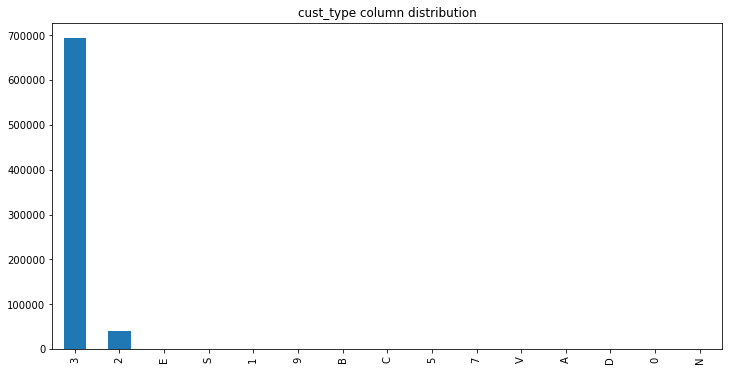

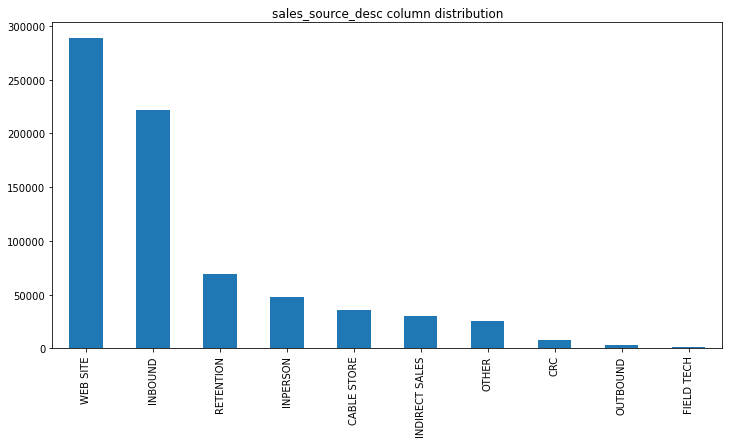

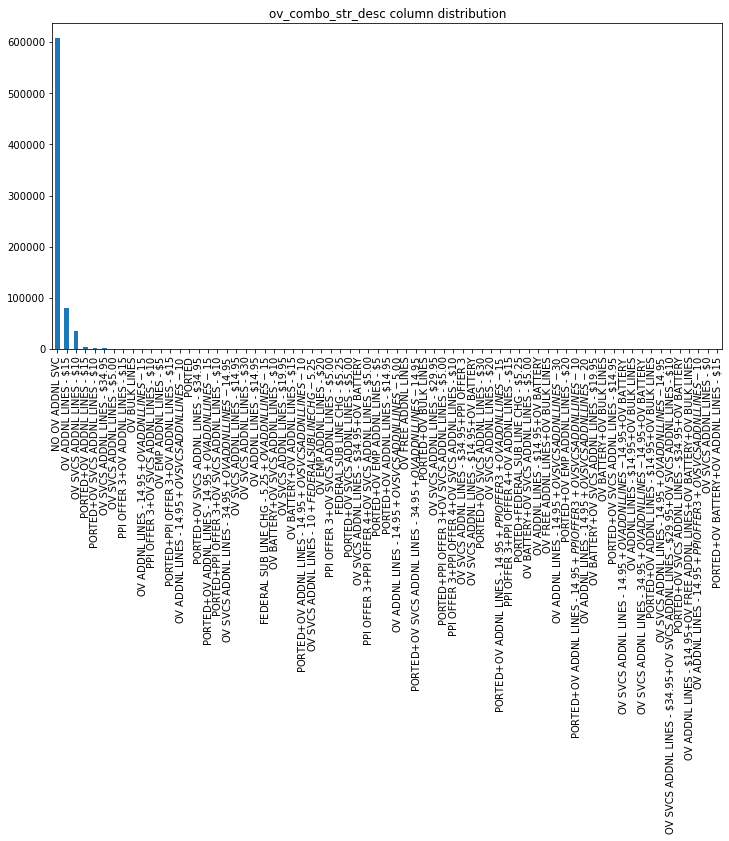

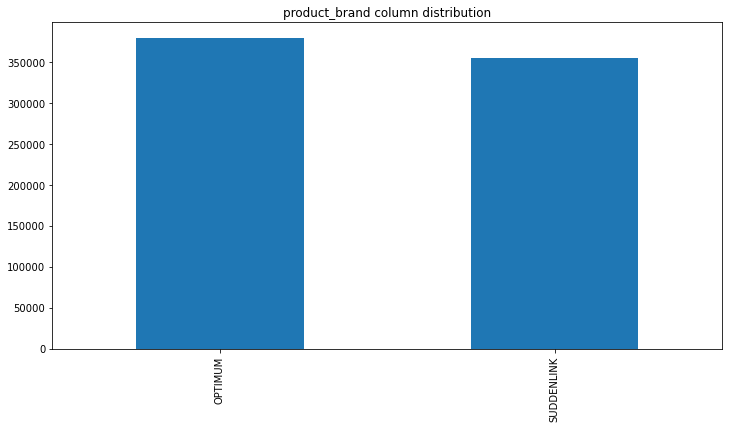

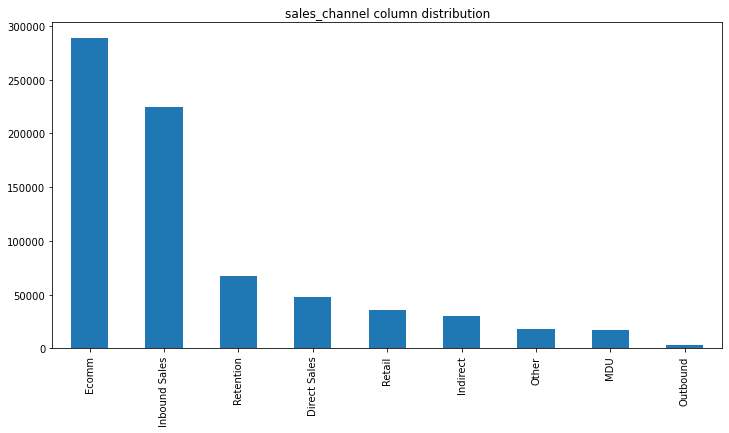

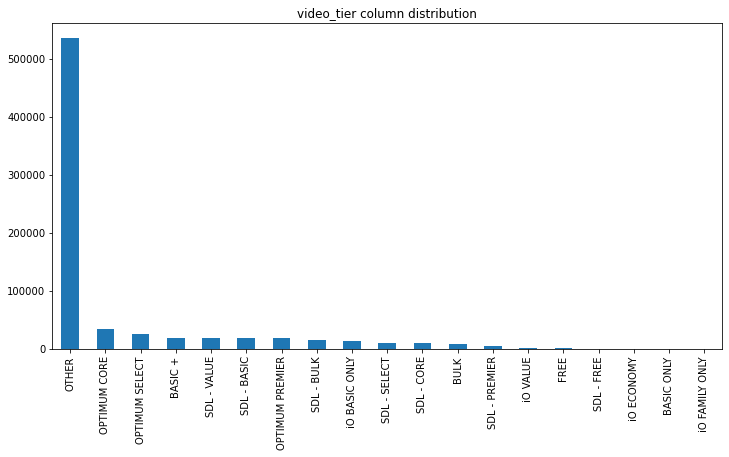

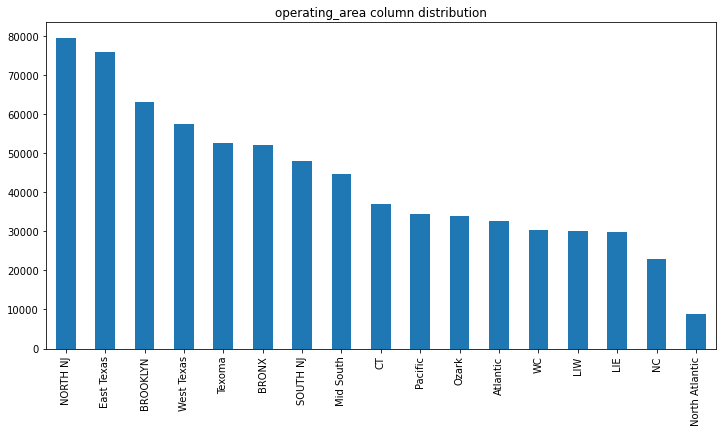

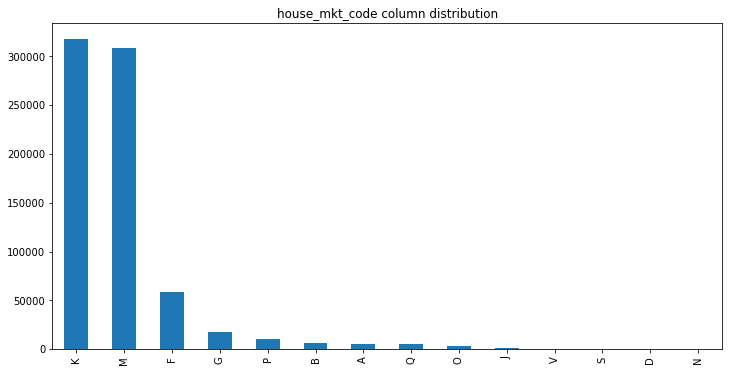

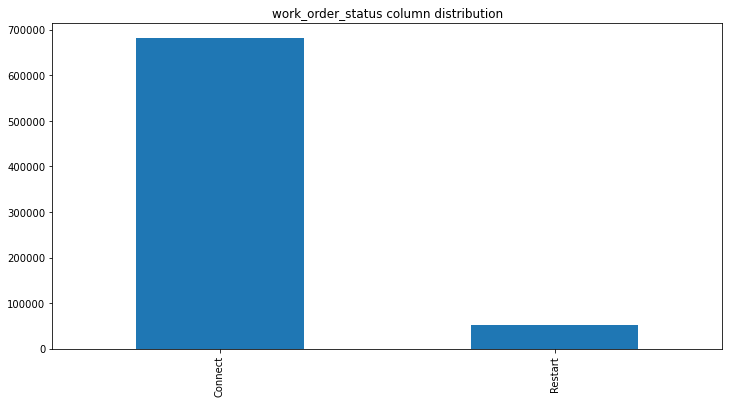

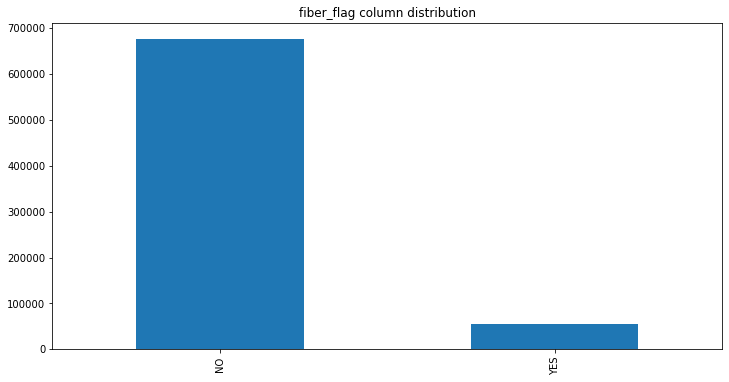

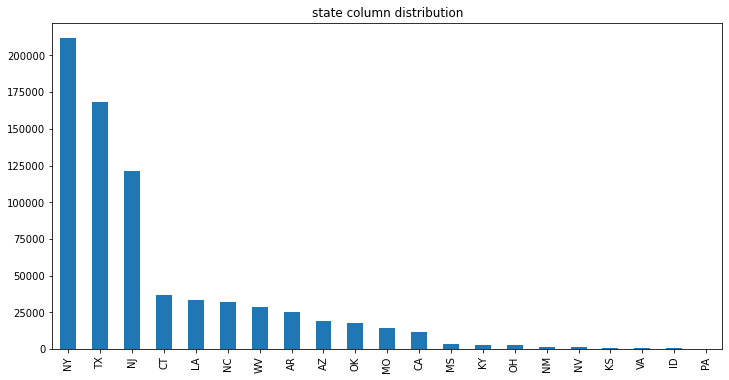

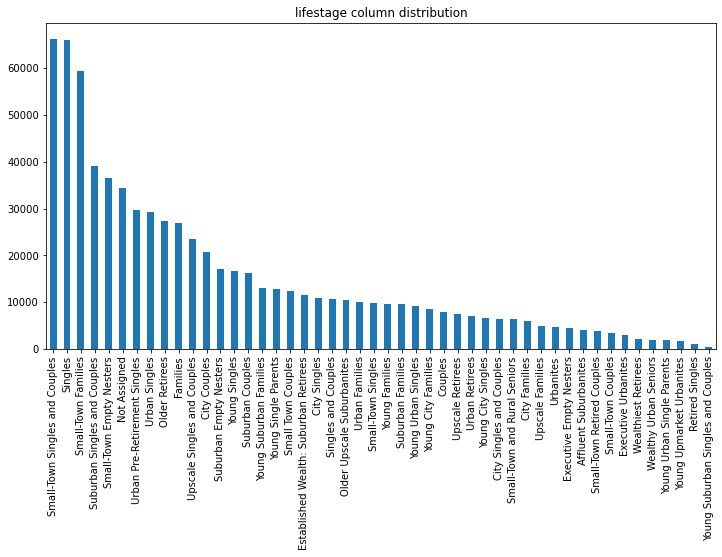

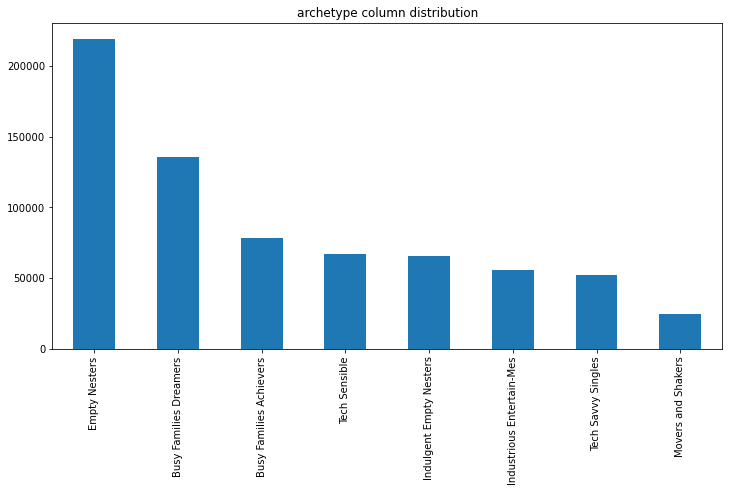

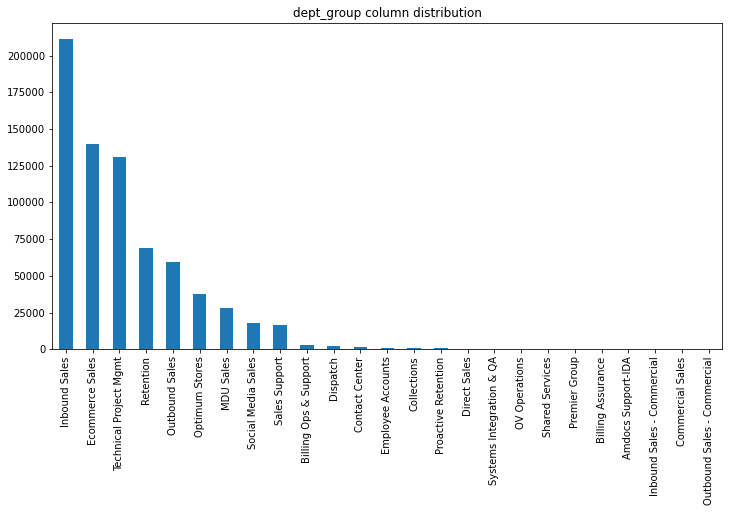

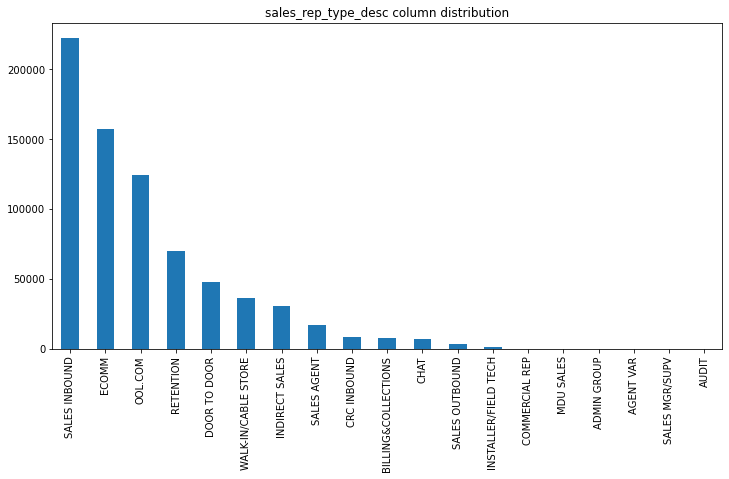

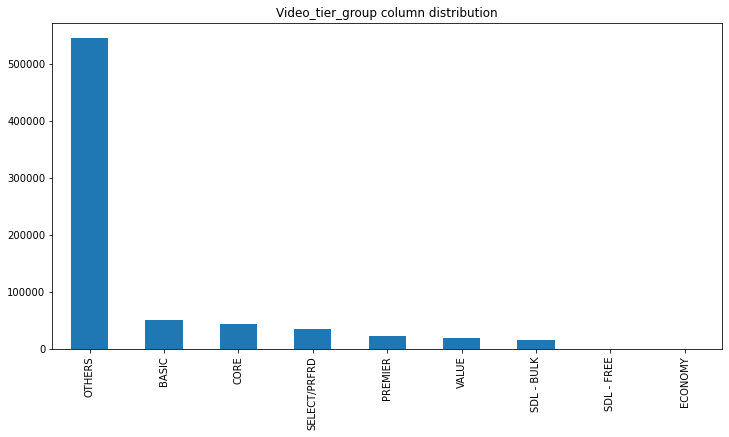

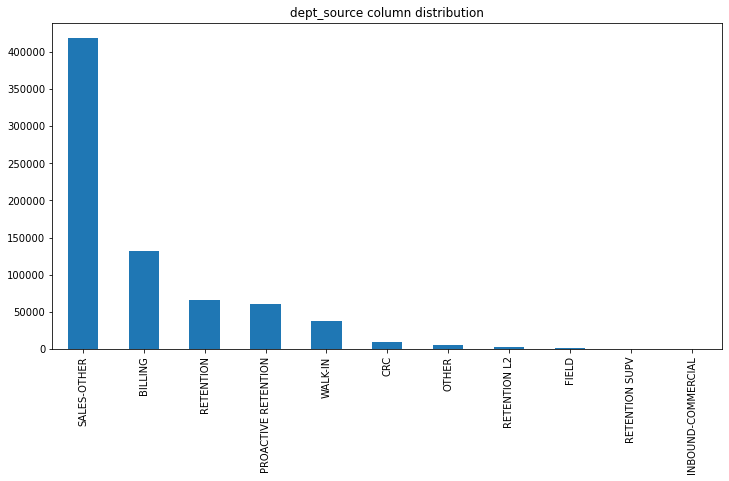

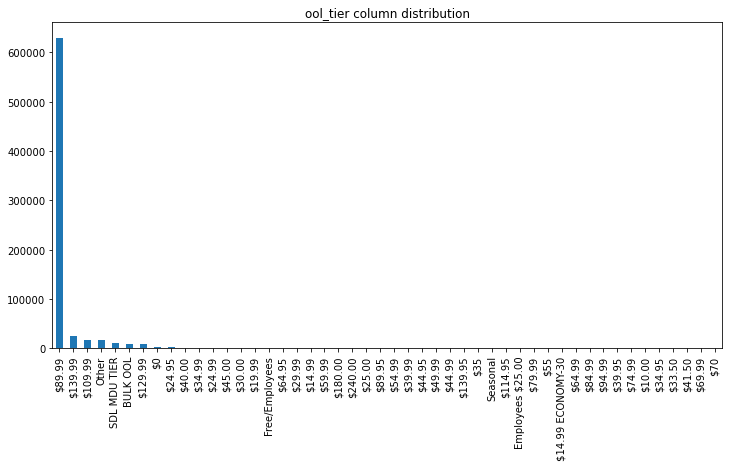

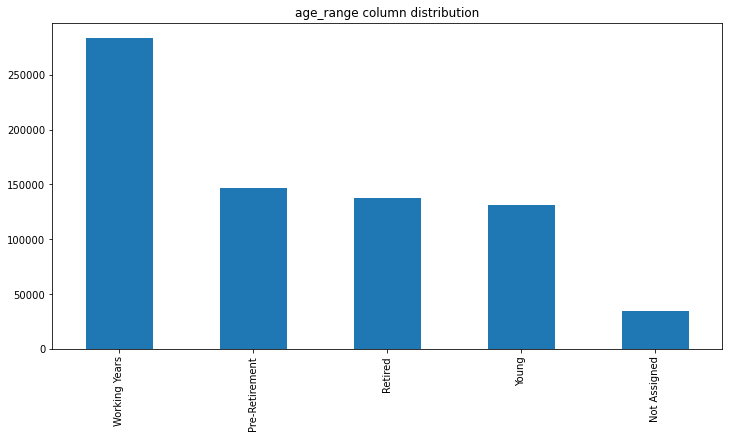

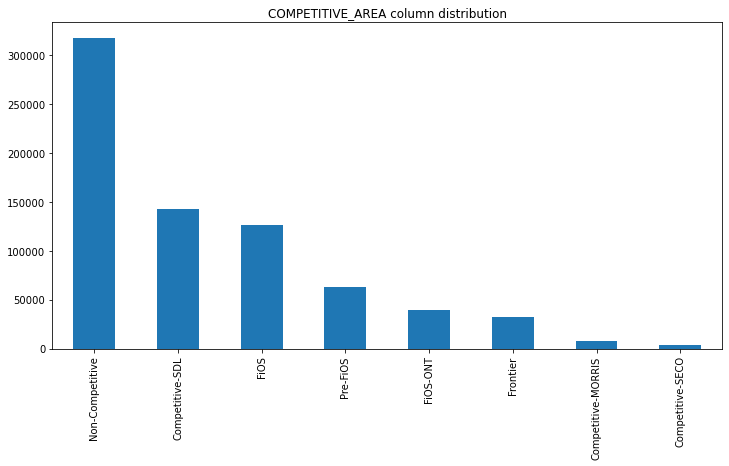

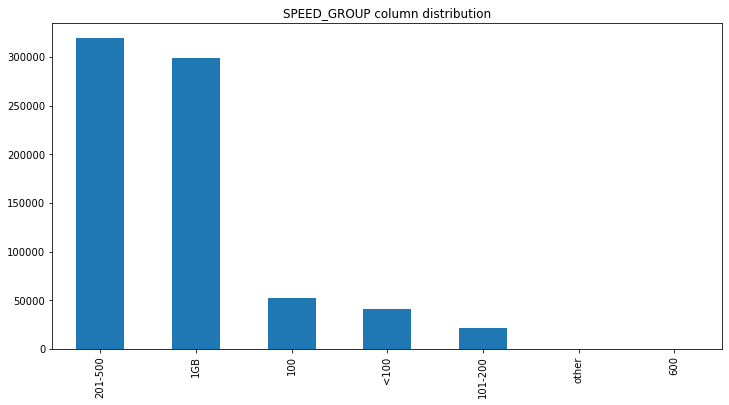

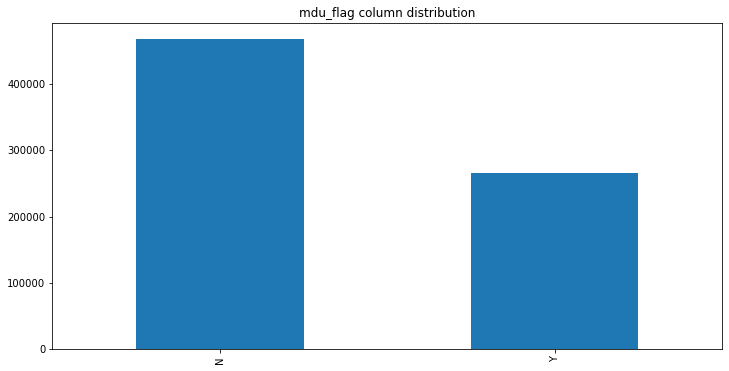

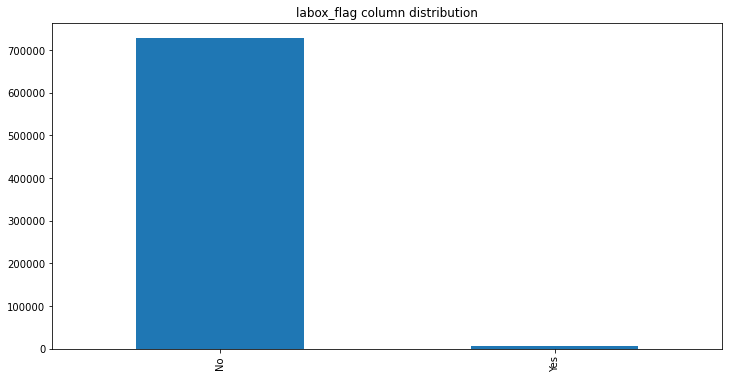

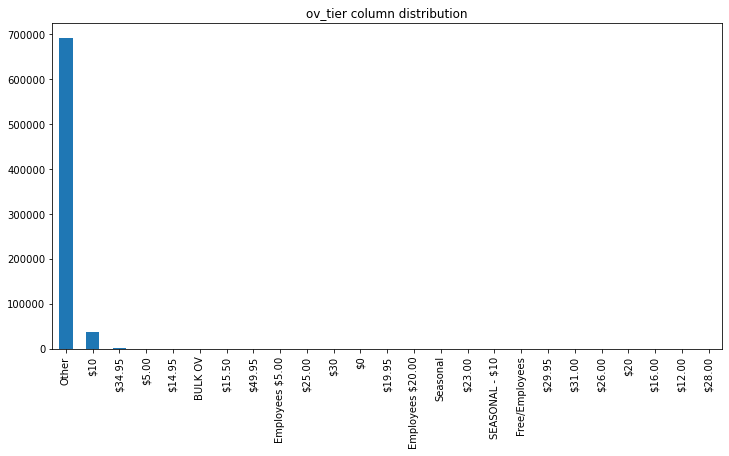

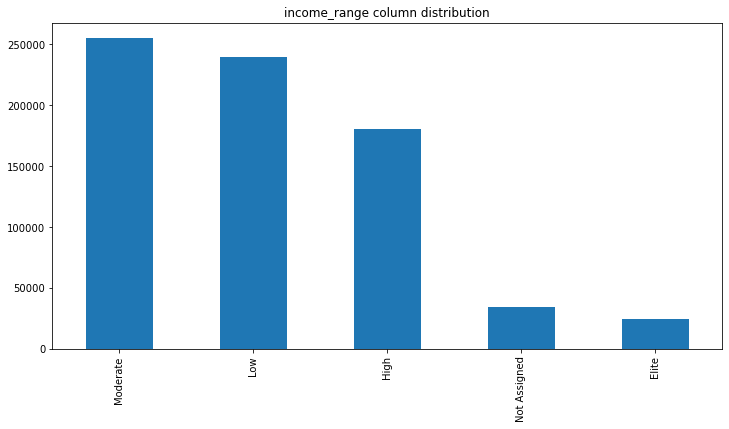

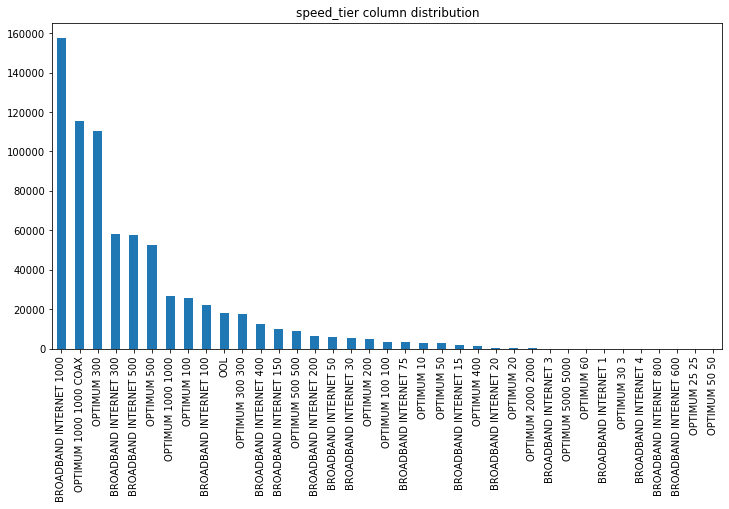

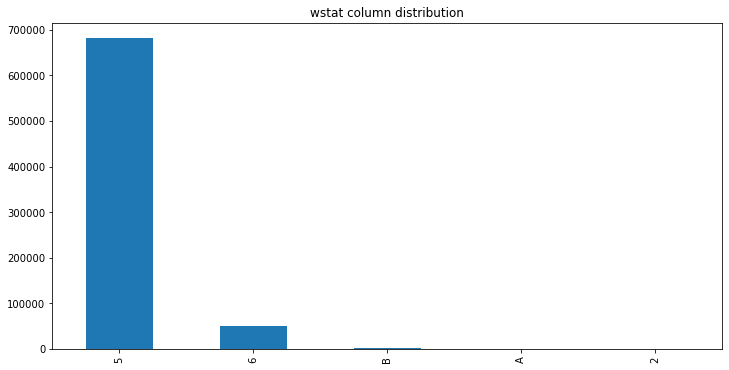

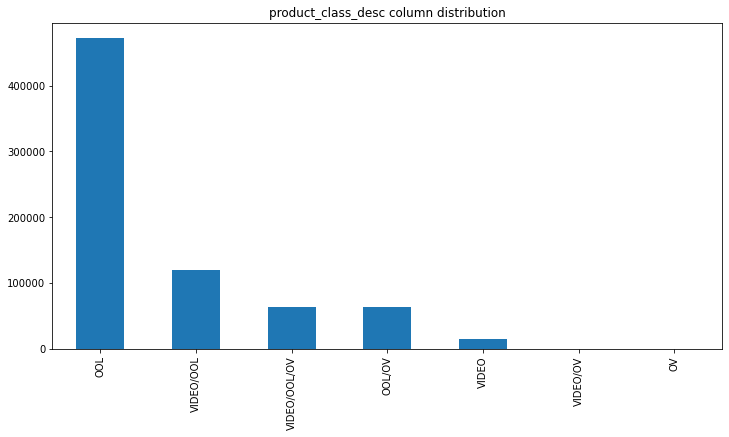

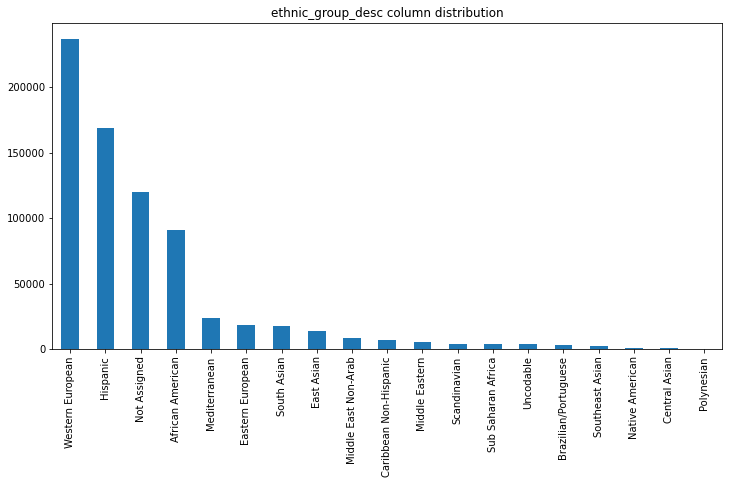

In [95]:
import matplotlib.pyplot as plt

for i_col in cat_columns_analysis :
    fig =  plt.figure(figsize=(12,6))
    df_filtered[i_col].value_counts().plot(kind='bar')
    plt.title( f"{i_col} column distribution" )
    plt.show()

    cust_type  -- column highly skew over 95% data resides in value 3 , no such information 
    ov_combo_str_desc -- column highly skew data gathered in few columns
    video_tier -- column high skew for OTHER column
    old_tier -- column highly skew
    ov_tier -- column highly skew
    wstat -- column highlt skew
    labox_flag -- column highly skew
    ool_tier -- column highly skew


    fiber_flag / work_order_status -- need further analaysis

In [14]:
cat_cols_final = set( cat_columns_analysis ) - set( [ 'cust_type' , 'ov_combo_str_desc' , 'video_tier' , 'old_tier' , 'ov_tier' , 'wstat' ,
                                                        'labox_flag' , 'ool_tier'
                                                     ] )

## Numeric Column Data Distribution Analysis

In [15]:
target_col =  'disco'
num_cols =  set( num_cols ) - set(['disco'])

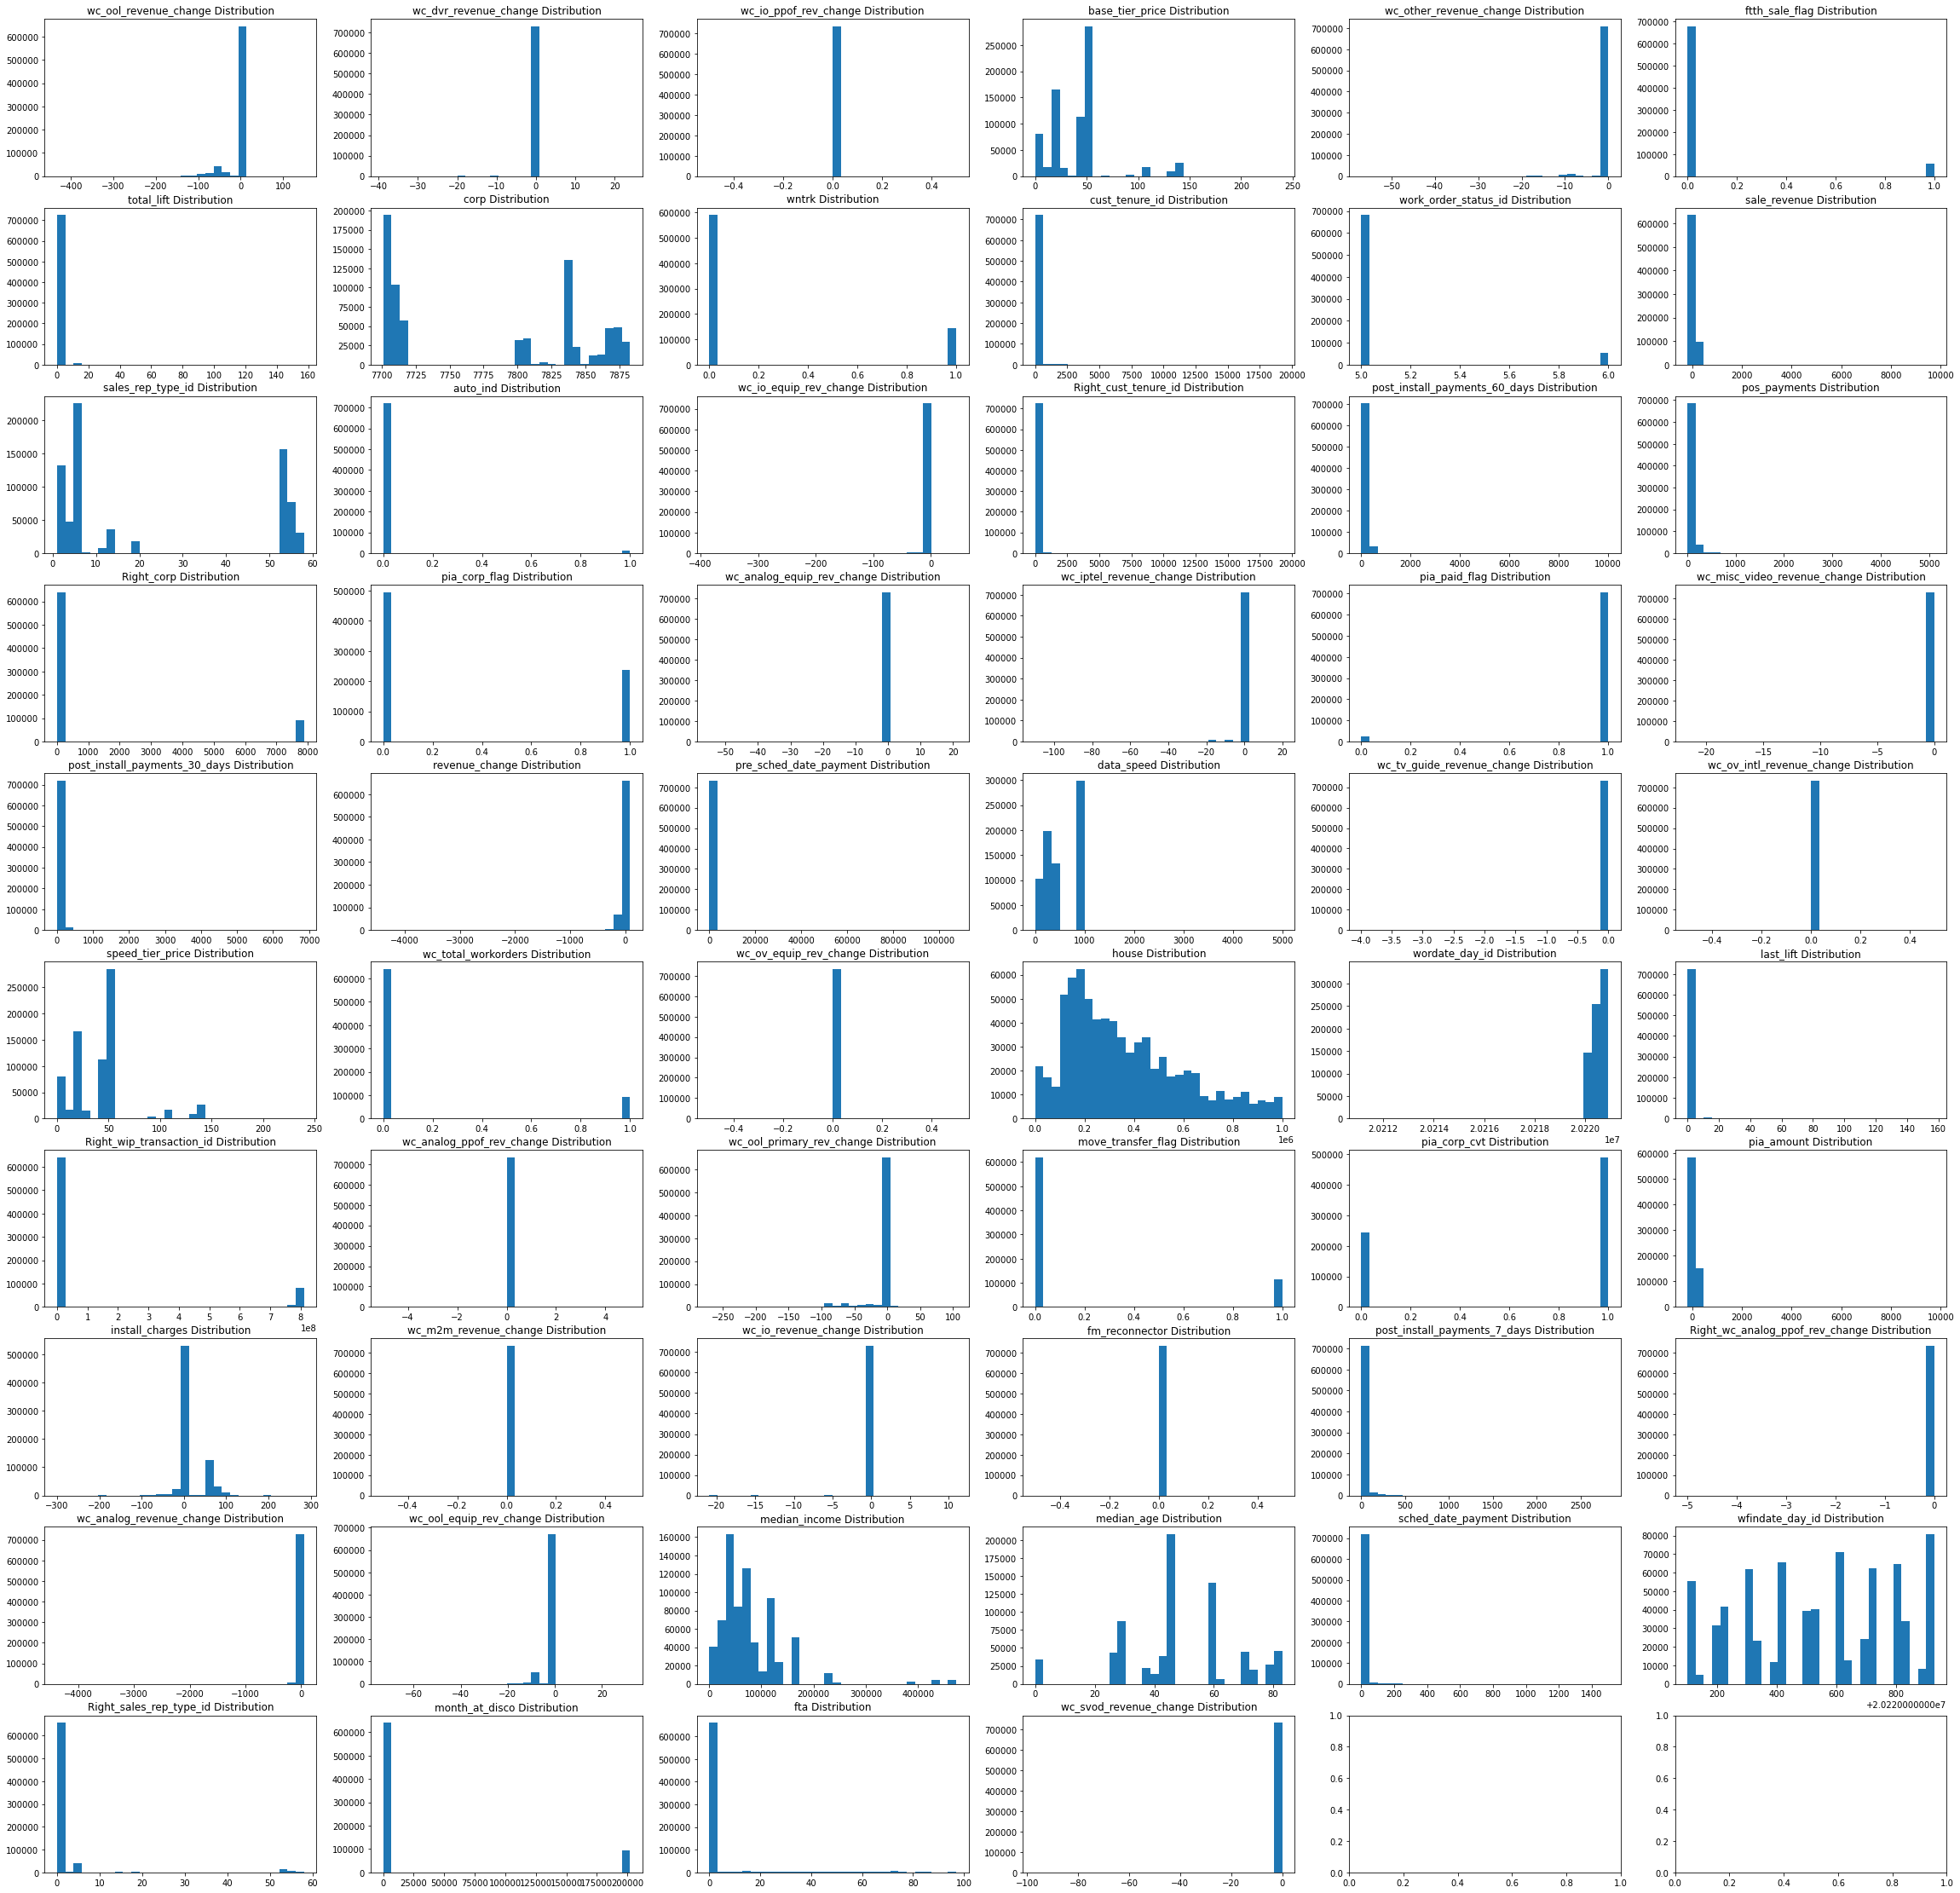

In [119]:
nr_of_categories = 10
nr_of_variables = 6

fig, ax = plt.subplots(nrows = nr_of_categories, ncols = nr_of_variables, figsize = (40, 40))

for category in np.arange(0, nr_of_categories):
  for variable in np.arange(0, nr_of_variables):
    try :
      ax[category, variable].hist( df_filtered[ list(num_cols)[variable + 6*category ] ] , bins= 30 )
      ax[ category , variable ].set_title( f"{  list(num_cols)[variable + 6*category ] } Distribution" )
    except :
      None

num columns to drop :

    wc_ov_intl_revenue_change -- constant values
    wc_dvr_revenue_change
    wc_io_ppof_rev_change
    cust_tenure_id
    Right_cust_tenure_id
    wc_analog_equip_rev_change
    wc_misc_video_revenue_change
    wc_tv_guide_revenue_change
    wc_ov_equip_rev_change
    wc_ov_intl_revenue_change
    wc_analog_ppof_rev_change
    wc_m2m_revenue_change
    wc_io_revenue_change
    fm_reconnector
    Right_wc_analog_ppof_rev_change
    wc_svod_revenue_change

worth to more analysis 

    ftth_sale_flag
    total_lift
    auto_ind

In [16]:
num_cols_final  = set( num_cols ) - set( [ 'wc_ov_intl_revenue_change' , 'wc_dvr_revenue_change' , 'wc_io_ppof_rev_change' , 'cust_tenure_id' , 'Right_cust_tenure_id' ,
                                            'wc_analog_equip_rev_change' , 'wc_misc_video_revenue_change' , 'wc_tv_guide_revenue_change' , 'wc_ov_equip_rev_change' , 'wc_analog_ppof_rev_change' ,
                                            'wc_m2m_revenue_change' , 'wc_io_revenue_change' , 'fm_reconnector' , 'Right_wc_analog_ppof_rev_change'  , 'wc_svod_revenue_change' , 
                                            'Right_sales_rep_type_id' , 'Right_wip_transaction_id' , 'sales_rep_type_id' , 'wfindate_day_id' , 'wordate_day_id' , 'work_order_status_id'
 ] )

## Final Columns

In [17]:
print( "Filtered Numeric Columns :" , num_cols_final)

Filtered Numeric Columns : {'wc_ool_primary_rev_change', 'revenue_change', 'wntrk', 'last_lift', 'sale_revenue', 'pos_payments', 'wc_other_revenue_change', 'wc_io_equip_rev_change', 'base_tier_price', 'wc_ool_equip_rev_change', 'wc_ool_revenue_change', 'Right_corp', 'ftth_sale_flag', 'pia_amount', 'wc_total_workorders', 'sched_date_payment', 'corp', 'pre_sched_date_payment', 'median_age', 'total_lift', 'speed_tier_price', 'month_at_disco', 'fta', 'pia_corp_flag', 'post_install_payments_30_days', 'wc_iptel_revenue_change', 'pia_paid_flag', 'post_install_payments_7_days', 'median_income', 'install_charges', 'move_transfer_flag', 'data_speed', 'post_install_payments_60_days', 'wc_analog_revenue_change', 'pia_corp_cvt', 'house', 'auto_ind'}


In [18]:
print("Filtered Categorical Columns : ", cat_cols_final )

Filtered Categorical Columns :  {'sales_rep_type_desc', 'state', 'dept_source', 'sales_source_desc', 'speed_tier', 'mdu_flag', 'sales_channel', 'ethnic_group_desc', 'product_class_desc', 'fiber_flag', 'work_order_status', 'COMPETITIVE_AREA', 'income_range', 'house_mkt_code', 'archetype', 'lifestage', 'age_range', 'operating_area', 'dept_group', 'SPEED_GROUP', 'Video_tier_group', 'product_brand'}


In [19]:
print("Target Columns : ", target_col)

Target Columns :  disco


## Data Preprocessing

In [ ]:
""" preprocessing steps 

step 1: null value treatment
step 2. clip outliers
step 3. scaling
"""

> numeric null value treatment

In [20]:
def null_treatment( df , num_cols ):

    # step 1. basic null treatment method replace every value by 0
    # step 2. further analysis and apply custom null value treatments to specific columns
    # step 3. apply data imputation methods to best fill according to the distribution of data

    df[ num_cols ] = df[ num_cols ].fillna(0)
    return df

> numeric scaler

In [21]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,StandardScaler,RobustScaler

def scaler( df , num_cols ) :
    # step1 . initialize the scaler object
    sclaer_obj =  RobustScaler()

    #step2 . fit the scaler
    sclaer_obj.fit( df[num_cols] )

    #step3. transform columns
    df[num_cols] =  sclaer_obj.transform( df[num_cols] )

    return df , sclaer_obj

> numeric outlier clipping

In [22]:
def outlier_clip( df , col ):
    # IQR
    # Find Q1, Q3
    # 1.
    for i_col in col :
        col_vals =  df[i_col]
        Q1 = np.percentile( col_vals, 25)
        Q3 = np.percentile( col_vals , 75)

        # 2.
        Q1,Q3 = np.percentile( col_vals, [25,75])

        # Find IQR, upper limit, lower limit
        IQR = Q3 - Q1
        ul = Q3+1.5*IQR
        ll = Q1-1.5*IQR

        # set the column clip
        df[i_col] = df[i_col].clip(lower= ll , upper=ul)
        
    return df

### apply numeric column feature transformations

In [23]:
# apply the numeric feature processing pipeline
df_preprocessed =  df_filtered.copy()

num_cols_final =  list( num_cols_final )

df_preprocessed =  null_treatment( df_preprocessed , num_cols= num_cols_final )
df_preprocessed = outlier_clip(  df_preprocessed , col=num_cols_final )
df_preprocessed , robust_scaler =  scaler( df_preprocessed , num_cols= num_cols_final )

In [24]:
df_preprocessed.head()

,age_range,archetype,auto_ind,base_tier_price,COMPETITIVE_AREA,corp,cust_tenure_id,cust_type,data_speed,dept_group,dept_source,disco,ethnic_desc,ethnic_group_desc,fiber_flag,fm_reconnector,fta,ftth_sale_flag,headend,house,house_mkt_code,income_range,install_charges,labox_flag,last_lift,lifestage,mdu_flag,median_age,median_income,misc_combo_str_desc,month_at_disco,move_transfer_flag,ool_tier,operating_area,ov_combo_str_desc,ov_tier,pia_amount,pia_corp_cvt,pia_corp_flag,pia_paid_flag,pos_payments,post_install_payments_30_days,post_install_payments_60_days,post_install_payments_7_days,pre_sched_date_payment,prem_combo_str_desc,product_brand,product_class_desc,revenue_change,Right_corp,Right_cust_tenure_id,Right_sales_rep_type_id,Right_slsrep,Right_wc_analog_ppof_rev_change,Right_wip_transaction_id,sale_revenue,sales_channel,sales_rep_type_desc,sales_rep_type_id,sales_source_desc,sched_date_payment,slsrep,SPEED_GROUP,speed_tier,speed_tier_price,state,total_lift,video_tier,Video_tier_group,wc_analog_equip_rev_change,wc_analog_ppof_rev_change,wc_analog_revenue_change,wc_dvr_revenue_change,wc_io_equip_rev_change,wc_io_ppof_rev_change,wc_io_revenue_change,wc_iptel_revenue_change,wc_m2m_revenue_change,wc_misc_video_revenue_change,wc_ool_equip_rev_change,wc_ool_primary_rev_change,wc_ool_revenue_change,wc_other_revenue_change,wc_ov_equip_rev_change,wc_ov_intl_revenue_change,wc_svod_revenue_change,wc_total_workorders,wc_tv_guide_revenue_change,wfin_date,wfindate,wfindate_day_id,wntrk,wordate,wordate_day_id,work_order_status,work_order_status_id,wstat,zipcode
0,Not Assigned,NaN,0.0,-1.333333,Non-Competitive,-0.75188,0,3,-0.571429,Technical Project Mgmt,BILLING,0,Not Assigned,Not Assigned,NO,0,0.0,0.0,"Arkadelphia, AR",-0.631458,M,Not Assigned,0.0,No,0.0,Not Assigned,N,-1.909091,-0.877307,OFFER TRACK2+ALTICE GATEWAY FEE - $10,0.0,0.0,$89.99,Mid South,NO OV ADDNL SVC,Other,0.453200,0.0,0.0,0.0,0.000000,2.5,0.739501,0.0,0.0,NO PREMIUM SVC,SUDDENLINK,OOL,0.0,0.0,0,0,7,0.0,0,-0.50000,Ecomm,OOL.COM,1,WEB SITE,0.0,7,100,BROADBAND INTERNET 100,-1.333333,AR,0.0,OTHER,OTHERS,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2022-01-06,2022-01-06,20220106,0.0,2022-01-01,20220101,Connect,5,5,71743
1,Not Assigned,NaN,0.0,0.333333,Competitive-SDL,-0.75188,0,3,0.714286,Ecommerce Sales,SALES-OTHER,0,Not Assigned,Not Assigned,NO,0,0.0,0.0,"Jonesboro, AR",-0.630852,P,Not Assigned,0.0,No,0.0,Not Assigned,N,-1.909091,-0.877307,HBO MAX - $14.99+OFFER TRACK2+STREAM - $5,0.0,0.0,$89.99,Mid South,NO OV ADDNL SVC,Other,-0.000133,-1.0,0.0,0.0,0.000000,0.0,-0.249815,0.0,0.0,NO PREMIUM SVC,SUDDENLINK,OOL,0.0,0.0,0,0,E2S,0.0,0,0.12500,Ecomm,ECOMM,54,WEB SITE,0.0,E2S,1GB,BROADBAND INTERNET 1000,0.333333,AR,0.0,OTHER,OTHERS,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2022-07-18,2022-07-18,20220718,0.0,2022-07-15,20220715,Connect,5,5,72401
2,Not Assigned,NaN,0.0,0.000000,Competitive-SDL,-0.75188,0,3,0.000000,Technical Project Mgmt,BILLING,0,Not Assigned,Not Assigned,NO,0,0.0,0.0,"Jonesboro, AR",-0.629228,P,Not Assigned,0.0,No,0.0,Not Assigned,N,-1.909091,-0.877307,OFFER TRACK2+AUTOPAY DISCOUNT,0.0,0.0,$89.99,Mid South,NO OV ADDNL SVC,Other,-0.133333,-1.0,0.0,0.0,0.909918,0.0,-0.080798,0.0,0.0,NO PREMIUM SVC,SUDDENLINK,OOL,0.0,0.0,0,0,7,0.0,0,-0.12475,Ecomm,OOL.COM,1,WEB SITE,0.0,7,201-500,BROADBAND INTERNET 500,0.000000,AR,0.0,OTHER,OTHERS,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2022-09-29,2022-09-29,20220929,0.0,2022-09-21,20220921,Connect,5,5,72401
3,Not Assigned,NaN,0.0,-0.666667,Non-Competitive,-0.75188,0,3,-0.285714,NaN,OTHER,0,Not Assigned,Not Assigned,NO,0,0.0,0.0,"Russellville, AR",-0.629167,P,Not Assigned,0.0,No,0.0,Not Assigned,N,-1.909091,-0.877307,AUTOPAY DISCOUNT,0.0,0.0,$89.99,Mid South,NO OV ADDNL SVC,Other,0.733200,-1.0,0.0,0.0,0.000000,0.0,-0.525968,0.0,0.0,NO PREMIUM SVC,SUDDENLINK,VIDEO/OOL,0.0,0.0,0,0,9,0.0,0,1.50000,Inbound Sales,SALES INBOUND,5,INBOUND,0.0,9,201-500,BROADBAND INTE

> category column most frequent value based null imputation

In [25]:
def cat_null_treatment( df , cols ):
    # apply the most frequent 
    df[cols] = df[cols].apply(lambda x:x.fillna(x.value_counts().index[0]))

    return df

In [26]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder

# apply the categorical transformations
cat_cols_final = list( cat_cols_final )

df_preprocessed =  cat_null_treatment( df_preprocessed , cat_cols_final )

In [27]:
import category_encoders as ce

# apply encoding
cat_enc = ce.OrdinalEncoder(cols =  cat_cols_final ) 
df_preprocessed =  cat_enc.fit_transform(df_preprocessed)

In [28]:
df_preprocessed.head()

,age_range,archetype,auto_ind,base_tier_price,COMPETITIVE_AREA,corp,cust_tenure_id,cust_type,data_speed,dept_group,dept_source,disco,ethnic_desc,ethnic_group_desc,fiber_flag,fm_reconnector,fta,ftth_sale_flag,headend,house,house_mkt_code,income_range,install_charges,labox_flag,last_lift,lifestage,mdu_flag,median_age,median_income,misc_combo_str_desc,month_at_disco,move_transfer_flag,ool_tier,operating_area,ov_combo_str_desc,ov_tier,pia_amount,pia_corp_cvt,pia_corp_flag,pia_paid_flag,pos_payments,post_install_payments_30_days,post_install_payments_60_days,post_install_payments_7_days,pre_sched_date_payment,prem_combo_str_desc,product_brand,product_class_desc,revenue_change,Right_corp,Right_cust_tenure_id,Right_sales_rep_type_id,Right_slsrep,Right_wc_analog_ppof_rev_change,Right_wip_transaction_id,sale_revenue,sales_channel,sales_rep_type_desc,sales_rep_type_id,sales_source_desc,sched_date_payment,slsrep,SPEED_GROUP,speed_tier,speed_tier_price,state,total_lift,video_tier,Video_tier_group,wc_analog_equip_rev_change,wc_analog_ppof_rev_change,wc_analog_revenue_change,wc_dvr_revenue_change,wc_io_equip_rev_change,wc_io_ppof_rev_change,wc_io_revenue_change,wc_iptel_revenue_change,wc_m2m_revenue_change,wc_misc_video_revenue_change,wc_ool_equip_rev_change,wc_ool_primary_rev_change,wc_ool_revenue_change,wc_other_revenue_change,wc_ov_equip_rev_change,wc_ov_intl_revenue_change,wc_svod_revenue_change,wc_total_workorders,wc_tv_guide_revenue_change,wfin_date,wfindate,wfindate_day_id,wntrk,wordate,wordate_day_id,work_order_status,work_order_status_id,wstat,zipcode
0,1,1,0.0,-1.333333,1,-0.75188,0,3,-0.571429,1,1,0,Not Assigned,1,1,0,0.0,0.0,"Arkadelphia, AR",-0.631458,1,1,0.0,No,0.0,1,1,-1.909091,-0.877307,OFFER TRACK2+ALTICE GATEWAY FEE - $10,0.0,0.0,$89.99,1,NO OV ADDNL SVC,Other,0.453200,0.0,0.0,0.0,0.000000,2.5,0.739501,0.0,0.0,NO PREMIUM SVC,1,1,0.0,0.0,0,0,7,0.0,0,-0.50000,1,1,1,1,0.0,7,1,1,-1.333333,1,0.0,OTHER,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2022-01-06,2022-01-06,20220106,0.0,2022-01-01,20220101,1,5,5,71743
1,1,1,0.0,0.333333,2,-0.75188,0,3,0.714286,2,2,0,Not Assigned,1,1,0,0.0,0.0,"Jonesboro, AR",-0.630852,2,1,0.0,No,0.0,1,1,-1.909091,-0.877307,HBO MAX - $14.99+OFFER TRACK2+STREAM - $5,0.0,0.0,$89.99,1,NO OV ADDNL SVC,Other,-0.000133,-1.0,0.0,0.0,0.000000,0.0,-0.249815,0.0,0.0,NO PREMIUM SVC,1,1,0.0,0.0,0,0,E2S,0.0,0,0.12500,1,2,54,1,0.0,E2S,2,2,0.333333,1,0.0,OTHER,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2022-07-18,2022-07-18,20220718,0.0,2022-07-15,20220715,1,5,5,72401
2,1,1,0.0,0.000000,2,-0.75188,0,3,0.000000,1,1,0,Not Assigned,1,1,0,0.0,0.0,"Jonesboro, AR",-0.629228,2,1,0.0,No,0.0,1,1,-1.909091,-0.877307,OFFER TRACK2+AUTOPAY DISCOUNT,0.0,0.0,$89.99,1,NO OV ADDNL SVC,Other,-0.133333,-1.0,0.0,0.0,0.909918,0.0,-0.080798,0.0,0.0,NO PREMIUM SVC,1,1,0.0,0.0,0,0,7,0.0,0,-0.12475,1,1,1,1,0.0,7,3,3,0.000000,1,0.0,OTHER,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2022-09-29,2022-09-29,20220929,0.0,2022-09-21,20220921,1,5,5,72401
3,1,1,0.0,-0.666667,1,-0.75188,0,3,-0.285714,3,3,0,Not Assigned,1,1,0,0.0,0.0,"Russellville, AR",-0.629167,2,1,0.0,No,0.0,1,1,-1.909091,-0.877307,AUTOPAY DISCOUNT,0.0,0.0,$89.99,1,NO OV ADDNL SVC,Other,0.733200,-1.0,0.0,0.0,0.000000,0.0,-0.525968,0.0,0.0,NO PREMIUM SVC,1,2,0.0,0.0,0,0,9,0.0,0,1.50000,2,3,5,2,0.0,9,3,4,-0.666667,1,0.0,SDL - BASIC,2,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2022-08-02,2022-08-02,20220802,0.0,2022-08-02,20220802,1,5,5,72801
4,1,1,0.0,-0.666667,1,-0.75188,0,3,-0.285714,3,3,0,Not Assigned,1,1,0,0.0,0.0,"Russellville, AR",-0.629167,2,1,0.0,No,0.0,1,1,-1.909091,-0.877307,AUTOPAY DISCOUNT,0.0,0.0,$89.99,1,NO OV ADDNL SVC,Other,2.133200,-1.0,0.0,0.0,0.000000,0.0,-0.525968,0.0,0.0,NO PREMIUM SVC,1,2,0.0,0.0,0,0,9,0.0,0,2.12500,3,3,5,2,0.0,2,3,4,-0.666667,1,0.0,SDL - BASIC,2,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2022-08-02,2022-08-05,20220802,0.0

> define the tain / evaluation feature set and target labels

In [29]:
x_cols = num_cols_final + cat_cols_final 

target_label = df_preprocessed[target_col]
feature_set =  df_preprocessed[ x_cols  ]

> split the dataset for traning and validation

In [30]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( feature_set ,
                                                    target_label ,
                                                    test_size=0.2,
                                                    random_state=7,
                                                    stratify=target_label )
                                                      
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (587052, 59)
Number transactions y_train dataset:  (587052,)
Number transactions X_test dataset:  (146763, 59)
Number transactions y_test dataset:  (146763,)


## evaluation measures

In [63]:
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt 

# define the target names
target_names = ['Non Churn', 'Churn' ]

def evaluate( target , prediction ):

    fig = plt.figure(figsize=(10,10))
    print("Confusion Matrix")
    cm = metrics.confusion_matrix( target , prediction )
    # plot the confusion matrix
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = [False, True])
    cm_display.plot()
    plt.show()

    print("\nClassification Report")

    # generate the classification report
    print(classification_report( target , prediction , target_names=target_names))

## XGBoost Classfier

In [52]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      objective='binary:logistic', 
                      n_estimators=30 , 
                      max_depth=100 , 
                      gamma=10)

In [53]:
xgb_cl.fit( X_train , y_train )

[16:05:45] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=10, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=30, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [55]:
expected_y  = y_test
predicted_y = xgb_cl.predict(X_test)

Confusion Matrix


<Figure size 720x720 with 0 Axes>

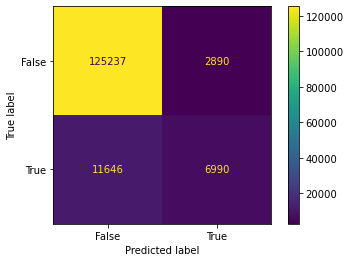


Classification Report
              precision    recall  f1-score   support

   Non Churn       0.91      0.98      0.95    128127
       Churn       0.71      0.38      0.49     18636

    accuracy                           0.90    146763
   macro avg       0.81      0.68      0.72    146763
weighted avg       0.89      0.90      0.89    146763



In [64]:
# evaluation on test dataset
evaluate( expected_y , predicted_y )

## Linear Regression Classifier

In [67]:
from sklearn.linear_model import LogisticRegression

modelCV = LogisticRegression(solver='liblinear',
                             
                             random_state=7)


modelCV.fit( X_train , y_train )

LogisticRegression(random_state=7, solver='liblinear')

Confusion Matrix


<Figure size 720x720 with 0 Axes>

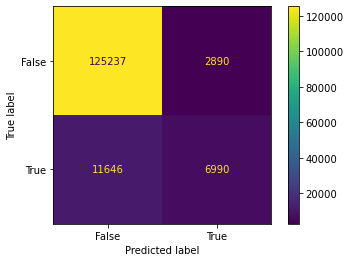


Classification Report
              precision    recall  f1-score   support

   Non Churn       0.91      0.98      0.95    128127
       Churn       0.71      0.38      0.49     18636

    accuracy                           0.90    146763
   macro avg       0.81      0.68      0.72    146763
weighted avg       0.89      0.90      0.89    146763



In [68]:
expected_y  = y_test
predicted_y = xgb_cl.predict(X_test)

# evalaution result visualization
evaluate( expected_y , predicted_y )

## RandomForest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_classifier =  RandomForestClassifier(class_weight = "balanced",
                                        n_estimators = 100 ,
                                        min_samples_split= 5 ,
                                        min_samples_leaf= 2 , 
                                        max_depth= 15 ,
                                       random_state=7)


grid_fit = rf_classifier.fit(X_train, y_train)

Confusion Matrix


<Figure size 720x720 with 0 Axes>

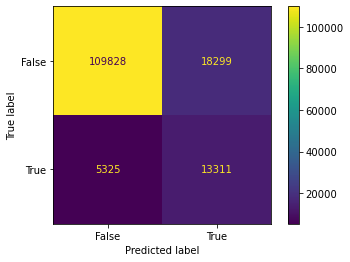


Classification Report
              precision    recall  f1-score   support

   Non Churn       0.95      0.86      0.90    128127
       Churn       0.42      0.71      0.53     18636

    accuracy                           0.84    146763
   macro avg       0.69      0.79      0.72    146763
weighted avg       0.89      0.84      0.86    146763



In [85]:
expected_y  = y_test
predicted_y = rf_classifier.predict(X_test)

evaluate( expected_y , predicted_y )